In [18]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [20]:
x_train.shape

(40000, 32, 32, 3)

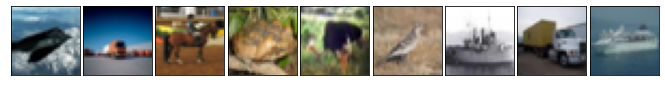

In [39]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])


In [40]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: ignored

In [37]:
# model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_valid, y_valid), verbose=1, callbacks=[EarlyStopping(patience=1, verbose=1)])
# early_stopping = EarlyStopping(patience=1, verbose=1)
# model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
#           validation_data=(x_valid, y_valid), callbacks=[early_stopping])

x_valid.shape, y_valid.shape

((10000, 32, 32, 3), (10000, 1))

In [45]:
early_stopping = EarlyStopping(patience=5, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
157/157 [==============================] - 1s 8ms/step - loss: 0.6819 - accuracy: 0.7638 - val_loss: 1.1791 - val_accuracy: 0.6151
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.6668 - accuracy: 0.7708 - val_loss: 1.1887 - val_accuracy: 0.6140
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6544 - accuracy: 0.7759 - val_loss: 1.2529 - val_accuracy: 0.6051
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6453 - accuracy: 0.7768 - val_loss: 1.2430 - val_accuracy: 0.6115
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 0.6343 - accuracy: 0.7809 - val_loss: 1.2401 - val_accuracy: 0.6093
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.6171 - accuracy: 0.7869 - val_loss: 1.2670 - val_accuracy: 0.6042
Epoch 6: early stopping


In [44]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.1923 - accuracy: 0.6034


[1.1922533512115479, 0.6033999919891357]